In [10]:
# * ライブラリのインポート
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
# * データセットの読み込み
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [12]:
# * データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# * PCAで2次元に圧縮
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [14]:
# * KNNモデルを訓練して決定境界を可視化する関数
def plot_knn_decision_boundary(X, y, k, title):
    # * KNN分類器を作成
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    # * グリッドの範囲を決めて、決定境界を描画
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Pastel1')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='Set1', alpha=0.8)

    plt.title(f'{title} (k={k})')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(handles=scatter.legend_elements()[0], labels=['Setosa', 'Versicolor', 'Virginica'], title="Classes")
    plt.grid(True)

In [15]:
# * kの値をリストで指定
k_values = [1, 3, 5, 7]

In [16]:
# * 決定境界を表示
plt.figure(figsize=(12, 10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

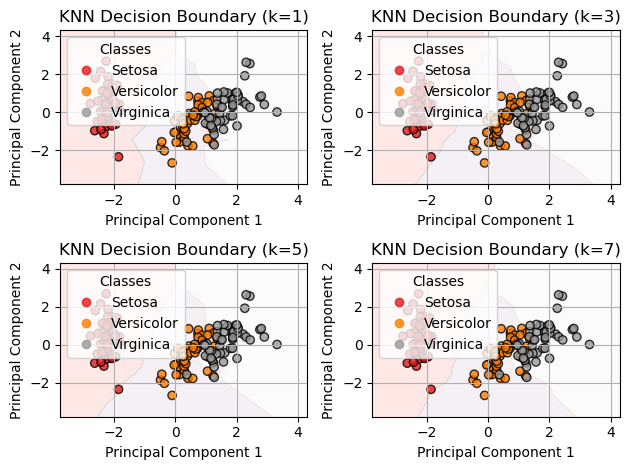

In [17]:
for i, k in enumerate(k_values, 1):
    plt.subplot(2, 2, i)
    plot_knn_decision_boundary(X_pca, y, k, 'KNN Decision Boundary')

plt.tight_layout()
plt.show()

In [18]:
# * 各kでの分類精度を計算
accuracies = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_pca, y)
    y_pred = model.predict(X_pca)
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)

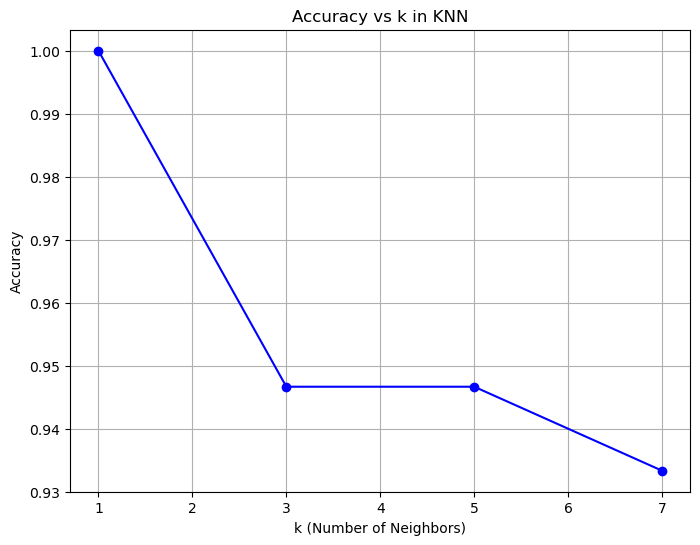

In [19]:
# * kによる分類精度の変化を可視化
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs k in KNN')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)